# Phase 2

Group Members: Elida Met-Hoxha (em744), Akanksha Sarkar (as2637), Camila Orr (ceo55)

**Research Question:** Where are the best locations for windmill placement in the United States?
For some context, we plan to define "best" given certain categories that not only make windmill placement lucrative (ie large generation of energy) but also physically, the windmill placement makes sense. The factors may include things like wind speed, land topography and geology, grid structure and distance (ie how much land is available for storage or generated energy), turbine size (ie site dependent specifications), and other economic/environmental factors. We may not necessarily consider all these factors in our final project, or perhaps we may consider something not even mentioned here. More context to be established as the project progresses and we have done more research on the subject.

## Datasets and Cleaning

Here, we first list links to the datasets that we used for phase 2. This includes most of our data collection and its associated cleaning, though, as we mentioned earlier, we are still accruing more data as we learn more about this subject and also as our data teaches us more about the limitations of our own question.

Then, we clean up some of these sets to show some preliminary summary statistics based on these datasets. 

**Datasets_1:** These include data from IRENASTAT Online Data Query Tool: https://www.irena.org/Statistics. First, we visualize how energy generation via wind has changed in the US in the past 20 years.  

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
from matplotlib import pyplot as plt

import duckdb, sqlalchemy

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

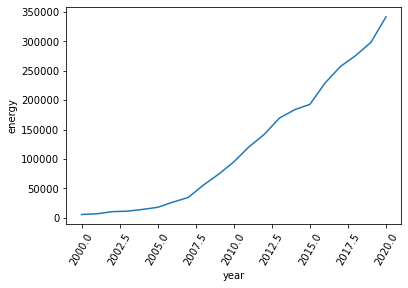

In [2]:
us_wind_df = pd.read_csv("us_annual_wind.csv")
year = us_wind_df.iloc[1, :].squeeze()[2:].reset_index(drop=True).astype(float)
energy = us_wind_df.iloc[2, :].squeeze()[2:].reset_index(drop=True).astype(float)
new_df = pd.DataFrame()
new_df['year'] = year
new_df['energy'] = energy


new_df
seaborn.lineplot(data = new_df , x = 'year', y = 'energy')
plt.xticks(rotation=60)
plt.show()
#change the year to datetime

**Dataset_2:** https://maps.nrel.gov/?da=wind-prospector#/?aL=wbDr04%255Bv%255D%3Dt&bL=groad&cE=0&lR=0&mC=41.80407814427234%2C-95.361328125&zL=4

In [3]:
ref_df = pd.read_csv("reference.csv")
ref_df.head()
# need to limit this down to reasonable areas... how do we define those criterion?

,Unnamed: 0,latitude,longitude,area_sq_km,capacity_mw,generation_mwh,capacity_factor,wind_speed_120meters,distance_to_transmission_km
0,32481,38.668999,-90.156998,0.5427,1.6281,5217.820421,0.365851,6.752910,0.041277
1,10603,45.380001,-92.155998,8.6184,25.8552,97673.112905,0.431244,7.488254,0.055366
2,4641,47.574001,-95.418999,13.9968,41.9904,174115.603258,0.473351,8.025779,0.076005
3,34512,38.020000,-100.928001,23.4252,70.2756,285496.416362,0.463759,8.148561,0.104679
4,21905,41.917000,-96.801003,30.2292,90.6876,373754.694846,0.470473,7.991315,0.132139


In [4]:
#area defined by two longitude and latitude points that will include all spatial points.
bounds = (ref_df.longitude.min(), ref_df.longitude.max(), ref_df.latitude.min(), ref_df.latitude.max())
bounds

(-124.76100158691406, -66.97000122070311, 25.40399932861328, 49.33300018310547)

In [5]:
map_us = plt.imread('map-3.png')

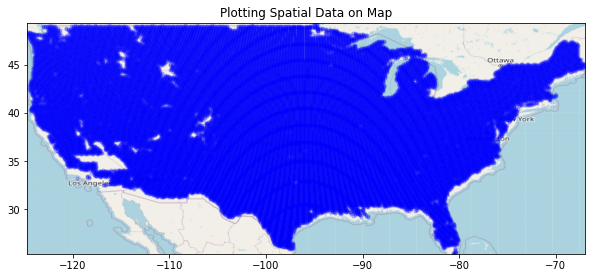

In [6]:
#can look at capacity? and plot with gradient color once this map is more aligned...
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(ref_df.longitude, ref_df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(bounds[0],bounds[1])
ax.set_ylim(bounds[2],bounds[3])
ax.imshow(map_us, zorder=0, extent = bounds, aspect= 'equal')

In [7]:
# need to do a join with another dataset that talks about fossil fuels so as to compare. 
# can also do a pie chart with US energy consumption when add fossil fuels
us_total_df = pd.read_csv("total_renewable.csv")
us_total_df = us_total_df.reset_index(drop = False).drop(labels='level_0', axis=1)
index = us_total_df.iloc[0,:].squeeze()[:].reset_index(drop=True)

us_total_df.columns.values[::] = index
us_total_df = us_total_df.drop(0)
us_total_df = us_total_df.transpose().reset_index(drop = False)

us_total_df.head()
index_2 = us_total_df.iloc[0,:].squeeze()[:].reset_index(drop=True)
us_total_df.columns.values[::] = index_2

us_total_df = us_total_df.drop(0)
us_total_df = us_total_df.rename(columns={'Technology': 'Year'}).drop(labels= 'Bagasse', axis = 1)
us_total_df = us_total_df.astype(float)


#these plots are disgusting, we should change them. 
#g = sns.PairGrid(us_total_df, x_vars='Year', y_vars=cols[1:])    
#g = g.map(plt.plot)
#plt.xticks(rotation=60)
#plt.show()

#how to plot all on same plot but with different colors describing type of energy
#for i in range(1,19):
 ##   sns.lineplot(data = us_total_df, x = 'Year', y = cols[i])
#    plt.xticks(rotation=60)
#plt.show()
   

In [8]:
# inner joining and plotting 

**contextualizing,** assessing ability of US energy production sources to meet demands, to anticipate production and technology challenges. We see here the increase of renewable resources, but then when new methods of fossil fuel production increased, fossil fuel usage increased as well. I will do an inner join above here to test that out. 

Basically, production versus consumption 

get data from EIA annual energy review about us energy production and consumption.

can make a logistic model for total US energy production.

with predictive modeling, we could also do a train/split so as to use more of what we have learned in class...

In [43]:
#note that all values here are given in quadrillion btu 
consumption_df = pd.read_csv("consumption.csv")
production_df = pd.read_csv("production.csv")
production_df = production_df.rename(columns={"Month": "date"})

#production_df.head()
%sql total_df << SELECT * FROM production_df INNER JOIN consumption_df ON production_df.date = consumption_df.Month  
total_df = total_df.drop('Month', axis = 1)

total_df['date'] = pd.to_datetime(total_df['date'], format = "%Y %B")
total_df.head()
print(total_df.shape)

total_df.head()

cols = total_df.columns.values  
for i in range(1,26):
    name = cols[i]
    total_df[name] = pd.to_numeric(total_df[name], errors = 'coerce')
total_df.head()

total_df['year'] = pd.DatetimeIndex(total_df['date']).year
total_df['month'] = pd.DatetimeIndex(total_df['date']).month
total_df.head()

Returning data to local variable total_df
(594, 26)


,date,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,...,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,year,month
0,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.272703,0.001491,NaN,...,0.068103,0.272703,0.001491,NaN,NaN,0.129787,0.403981,7.223873,1973,1
1,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.242199,0.001363,NaN,...,0.064634,0.242199,0.001363,NaN,NaN,0.117338,0.360900,6.592366,1973,2
2,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.268810,0.001412,NaN,...,0.072494,0.268810,0.001412,NaN,NaN,0.129938,0.400161,6.521439,1973,3
3,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.253185,0.001649,NaN,...,0.064070,0.253185,0.001649,NaN,NaN,0.125636,0.380470,5.941729,1973,4
4,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.260770,0.001537,NaN,...,0.062111,0.260770,0.001537,NaN,NaN,0.129834,0.392141,6.071940,1973,5


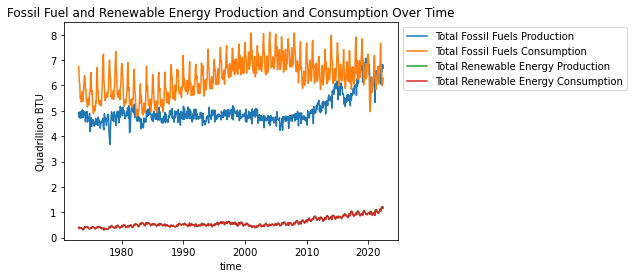

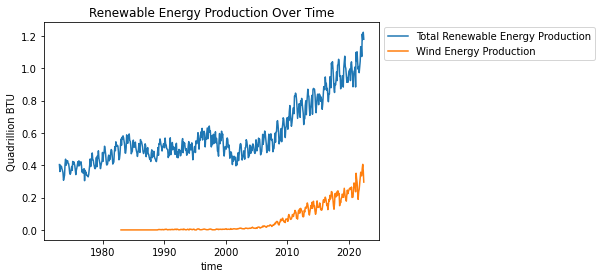

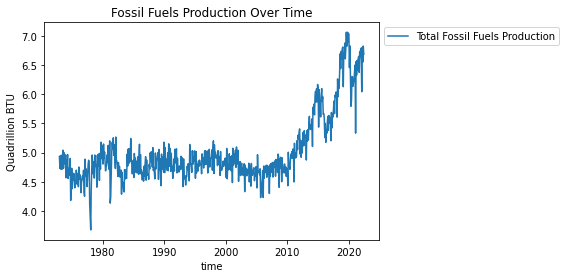

In [44]:
# make plots better, change also the axis titles 
sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Production', label = 'Total Fossil Fuels Production')
sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Consumption', label = 'Total Fossil Fuels Consumption')
sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Production', label = 'Total Renewable Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Consumption', label = 'Total Renewable Energy Consumption')
#plt.show()

plt.title("Fossil Fuel and Renewable Energy Production and Consumption Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

sns.lineplot(data = total_df, x = 'date', y = 'Total Renewable Energy Production', label = 'Total Renewable Energy Production')
sns.lineplot(data = total_df, x = 'date', y = 'Wind Energy Production', label = 'Wind Energy Production')


plt.title("Renewable Energy Production Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


sns.lineplot(data = total_df, x = 'date', y = 'Total Fossil Fuels Production', label = 'Total Fossil Fuels Production')
plt.title("Fossil Fuels Production Over Time")
plt.xlabel("time")
plt.ylabel("Quadrillion BTU")
 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Returning data to local variable energy_2022


<function matplotlib.pyplot.show(close=None, block=None)>

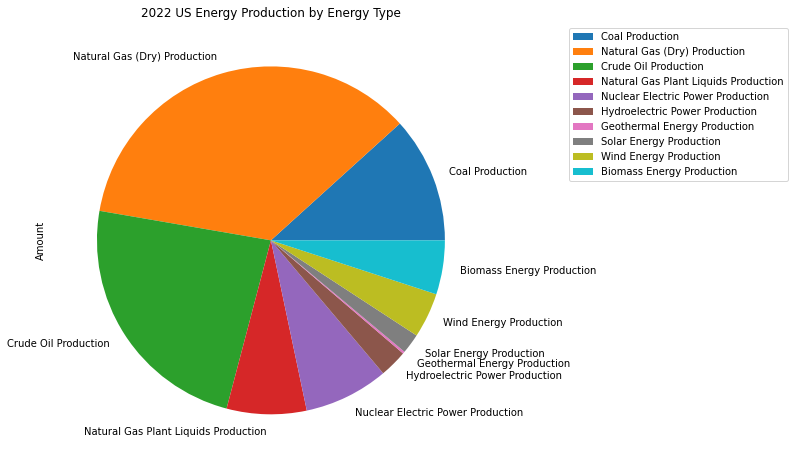

In [118]:
# make a pie chart for most recent year 
%sql energy_2022 << SELECT * FROM total_df WHERE year = 2022
col = energy_2022.columns
avg_production = pd.DataFrame(energy_2022[col[1:12]].mean(axis=0))
avg_production = avg_production.rename(columns={ 0 : "Amount"}).drop('Total Fossil Fuels Production')
                                                                    
avg_production.plot.pie(y='Amount', figsize=(8, 8))
plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.title("2022 US Energy Production by Energy Type")
plt.show

In [ ]:
#just looking at another version of the same files basically 
new_cons = pd.read_csv("cons.csv")
new_prod = pd.read_csv("prod.csv")
new_cons.head()